In [1]:
import pandas as pd
import os

file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Dec_2_1100nm/Pandora288s1_Agam_20241202_L0.txt'

base_name = os.path.basename(file_path)
csv_file_name = os.path.splitext(base_name)[0] + '.csv'

# Read the entire file
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()

data_lines = lines[49:]
#data_lines = lines

# Process each line to split into rows and columns
data_list = []
for line in data_lines:
    # Strip the newline character and split by tabs
    rows = line.strip().split('\t')
    for row in rows:
        # Split each row by spaces
        columns = row.split()
        data_list.append(columns)

# Convert the list of lists into a DataFrame
data7 = pd.DataFrame(data_list)
# Convert the necessary columns to numeric before saving
data7.iloc[:, 2:] = data7.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Define the column names
column_names = [
    'routine', 'time (yyyymmddThhmmssZ)', 'Routine count', 'Repetition count', 'measurement duration (s)',
    'Integration time [ms]', 'Number of cycles', 'Saturation index', 'filterwheel 1', 'filterwheel 2',
    'Pointing zenith angle (degree)', 'Zenith pointing mode', 'Pointing azimuth (degree)', 'Azimuth pointing mode',
    'Mean over camera offsets [deg]','Max over camera offsets [deg]',
    'Data processing type', 'Target distance [m]', 'Temperature at electronics board (C)',
    'Spectrometer control temperature (C)', 'Auxiliary spectrometer temperature (C)', 'Temperature in head sensor (C)',
    'Humidity in head sensor (%)', 'Pressure in head sensor (hPa)', 'Scale factor for data', 'Uncertainty indicator'
] + [f'Mean pixel {i}' for i in range(1, 2049)] + [f'Uncertainty {i}' for i in range(1, 2049)]

# Assign column names to the DataFrame
data7.columns = column_names

save_folder = "/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Dec_2_1100nm/"

# Save the DataFrame to a CSV file with the same name as the initial text file
data7.to_csv(os.path.join(save_folder, csv_file_name), index=False)

print(f"Data saved to {os.path.join(save_folder, csv_file_name)}")

Data saved to /Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Dec_2_1100nm/Pandora288s1_Agam_20241202_L0.csv


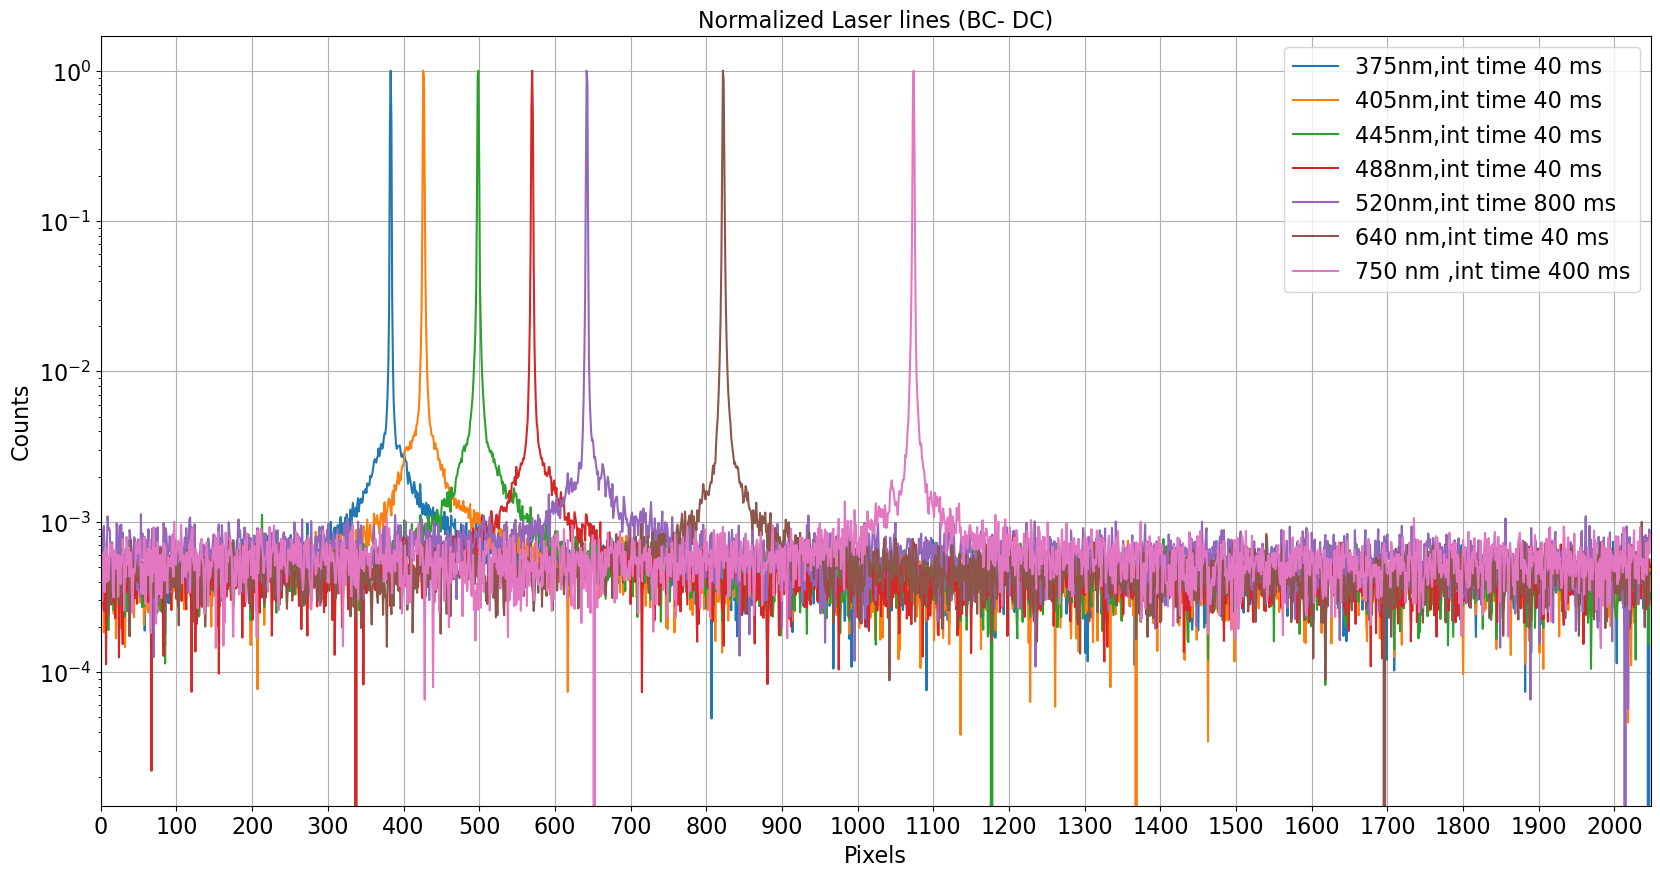

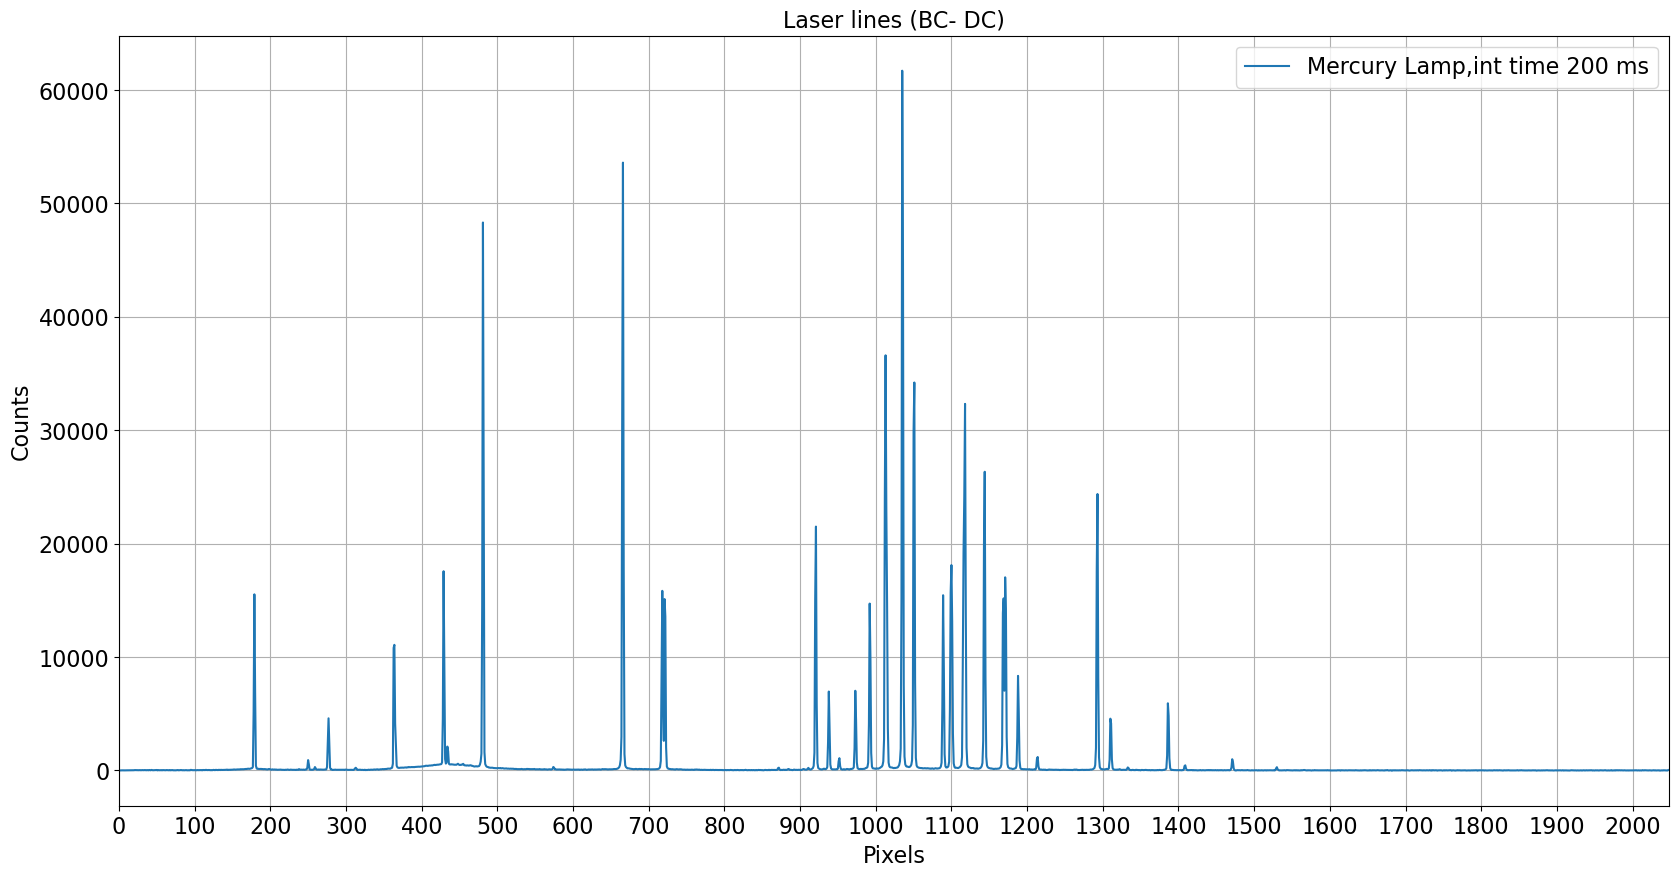

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def normalize(data):
    n = (data - min(data)) / (max(data)- min(data))
    return n

pixels = np.arange(0, 2048)

lsf_375nm_bc = ((data7.iloc[0:3, 26:2074]).div(data7.iloc[0:3, 24], axis=0)).values
dc = ((data7.iloc[3:6, 26:2074]).div(data7.iloc[3:6, 24], axis=0)).values
lsf_375nm = lsf_375nm_bc - dc
int_375 = np.array([40, 400, 2000])

lsf_405nm_bc = ((data7.iloc[6:9, 26:2074]).div(data7.iloc[6:9, 24], axis=0)).values
lsf_405nm = lsf_405nm_bc - dc
int_405 = int_375

lsf_445nm_bc = ((data7.iloc[9:12, 26:2074]).div(data7.iloc[9:12, 24], axis=0)).values
lsf_445nm = lsf_445nm_bc - dc
int_445 = int_375

lsf_488nm_bc = ((data7.iloc[12:15, 26:2074]).div(data7.iloc[12:15, 24], axis=0)).values
dc_488 = ((data7.iloc[15:18, 26:2074]).div(data7.iloc[15:18, 24], axis=0)).values
lsf_488nm = lsf_488nm_bc - dc_488
int_488 = int_375

lsf_green_bc = ((data7.iloc[18:21, 26:2074]).div(data7.iloc[18:21, 24], axis=0)).values
dc_green = ((data7.iloc[21:24, 26:2074]).div(data7.iloc[21:24, 24], axis=0)).values
lsf_green = lsf_green_bc - dc_green
lsf_green[:, 1100:1150] = lsf_green[:, 1000:1050]
int_green = np.array([800, 2000, 4000])

lsf_640nm_bc = ((data7.iloc[24:27, 26:2074]).div(data7.iloc[24:27, 24], axis=0)).values
lsf_640nm = lsf_640nm_bc - dc
lsf_640nm[:, 1900:2000] = lsf_640nm[:, 1800:1900]
int_640 = int_375

lsf_700nm_bc = ((data7.iloc[27:30, 26:2074]).div(data7.iloc[27:30, 24], axis=0)).values
dc_700 = ((data7.iloc[30:33, 26:2074]).div(data7.iloc[30:33, 24], axis=0)).values
lsf_700nm = lsf_700nm_bc - dc_700
int_700 = np.array([400, 2000, 4000])

mercury_bc = ((data7.iloc[33:38, 26:2074]).div(data7.iloc[33:38, 24], axis=0)).values
dc_mercury = ((data7.iloc[38:43, 26:2074]).div(data7.iloc[38:43, 24], axis=0)).values
mercury_lamp = mercury_bc - dc_mercury
int_mercury= np.array([100, 180, 200, 2000, 4000])

# lsf_375nm2 = lsf_375nm_bc - dc_488
# lsf_405nm2 = lsf_405nm_bc - dc_488
# lsf_445nm2= lsf_445nm_bc - dc_488

# plt.figure(figsize=(20, 10))
# plt.yscale('log')
# plt.xlim(0,2048)
# for row in range(0,1):
#     plt.plot((lsf_375nm[row, :]), label= f'375nm,int time {int_375[row]} ms')    
#     plt.plot((lsf_405nm[row, :]), label= f'405nm,int time {int_405[row]} ms')
#     plt.plot((lsf_445nm[row, :]), label= f'445nm,int time {int_445[row]} ms')     
#     plt.plot((lsf_488nm[row, :]), label= f'488nm,int time {int_488[row]} ms') 
#     plt.plot((lsf_green[row, :]), label= f'Green Laser,int time {int_green[row]} ms') 
#     plt.plot((lsf_640nm[row, :]), label= f'640 nm,int time {int_640[row]} ms')
#     plt.plot((lsf_700nm[row, :]), label= f'~750 nm ,int time {int_700[row]} ms') 
# plt.xticks(np.arange(0, 2048, 100),fontsize=16)
# plt.xlabel('Pixels',fontsize=16)
# plt.ylabel('Counts',fontsize=16)
# plt.title('Laser lines (BC- DC)',fontsize=16)
# # plt.ylim(-1000,1000)
# plt.legend(fontsize=16)
# #plt.grid(True)
# plt.show()

plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(normalize(lsf_375nm[row, :]), label= f'375nm,int time {int_375[row]} ms')    
    plt.plot(normalize(lsf_405nm[row, :]), label= f'405nm,int time {int_405[row]} ms')
    plt.plot(normalize(lsf_445nm[row, :]), label= f'445nm,int time {int_445[row]} ms')     
    plt.plot(normalize(lsf_488nm[row, :]), label= f'488nm,int time {int_488[row]} ms') 
    plt.plot(normalize(lsf_green[row, :]), label= f'520nm,int time {int_green[row]} ms') 
    plt.plot(normalize(lsf_640nm[row, :]), label= f'640 nm,int time {int_640[row]} ms')
    plt.plot(normalize(lsf_700nm[row, :]), label= f'750 nm ,int time {int_700[row]} ms') 
plt.xticks(np.arange(0, 2048, 100),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Normalized Laser lines (BC- DC)',fontsize=16)
# plt.ylim(-1000,1000)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(2,3):
    plt.plot((mercury_lamp[row, :]), label= f'Mercury Lamp,int time {int_mercury[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Laser lines (BC- DC)',fontsize=16)
#plt.ylim(0,0.0035)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

Pixels illuminated:
383 426 499 570 642 822 1074


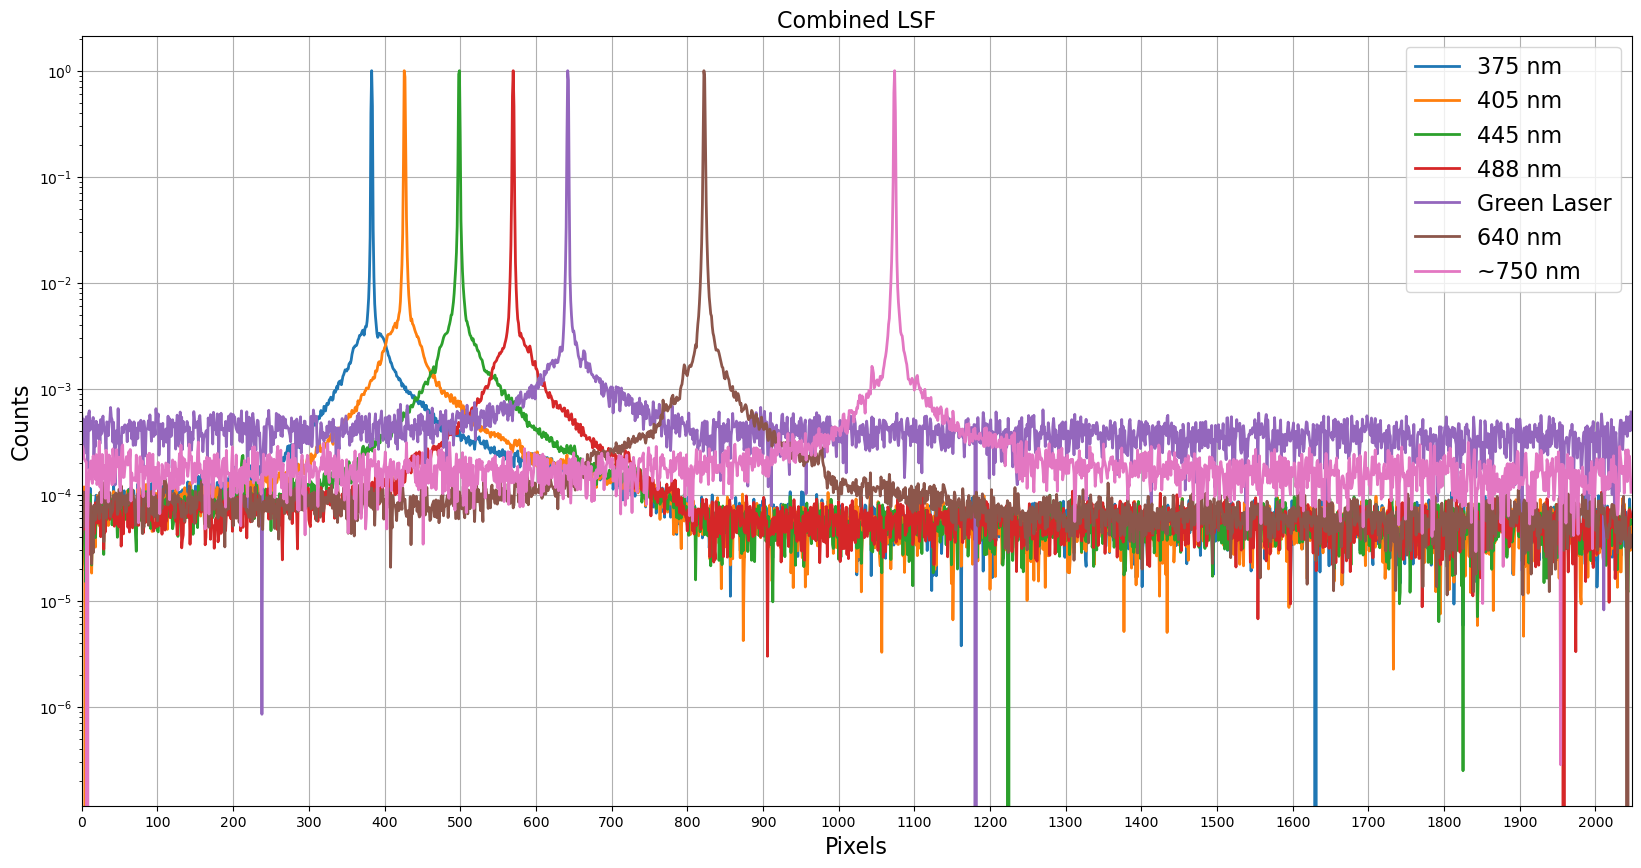

In [203]:
import numpy as np
import matplotlib.pyplot as plt

def combine_LSF(normal_LSF, saturated_LSF, near_peak_offset=10):
    # Find the near-peak region based on the normal LSF
    near_peak_start = np.argmax(normal_LSF) - near_peak_offset
    near_peak_end = np.argmax(normal_LSF) + near_peak_offset

    # Step 1: Calculate the pixel-by-pixel scaling factor in the near-peak region
    scaling_factors = saturated_LSF[near_peak_start:near_peak_end] / normal_LSF[near_peak_start:near_peak_end]
    average_scaling_factor = np.mean(scaling_factors)  # Average over the near-peak region

    # Step 2: Scale the saturated LSF
    scaled_saturated_LSF = (saturated_LSF / average_scaling_factor)

    # Step 3: Combine the normal LSF (in-band region) with the scaled saturated LSF (out-of-band region)
    combined_LSF = np.copy(scaled_saturated_LSF)
    combined_LSF[near_peak_start:near_peak_end] = normal_LSF[near_peak_start:near_peak_end]
    return combined_LSF

combine_LSF_375nm = combine_LSF(normalize(lsf_375nm[0, :]), normalize(lsf_375nm[1, :]))
combine_LSF_405nm = combine_LSF(normalize(lsf_405nm[0, :]), normalize(lsf_405nm[1, :]))
combine_LSF_445nm = combine_LSF(normalize(lsf_445nm[0, :]), normalize(lsf_445nm[1, :]))
combine_LSF_488nm = combine_LSF(normalize(lsf_488nm[0, :]), normalize(lsf_488nm[1, :]))
combine_LSF_green = combine_LSF(normalize(lsf_green[0, :]), normalize(lsf_green[1, :]))
combine_LSF_640nm = combine_LSF(normalize(lsf_640nm[0, :]), normalize(lsf_640nm[1, :]))
combine_LSF_750nm = combine_LSF(normalize(lsf_700nm[0, :]), normalize(lsf_700nm[1, :]))

print('Pixels illuminated:')
print(np.argmax(combine_LSF_375nm), np.argmax(combine_LSF_405nm), np.argmax(combine_LSF_445nm), np.argmax(combine_LSF_488nm), np.argmax(combine_LSF_green), np.argmax(combine_LSF_640nm), np.argmax(combine_LSF_750nm))

plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.xticks(np.arange(0, 2048, 100))
plt.plot(pixels, combine_LSF_375nm, label="375 nm", linewidth=2)
plt.plot(pixels, combine_LSF_405nm, label="405 nm", linewidth=2)
plt.plot(pixels, combine_LSF_445nm, label="445 nm", linewidth=2)
plt.plot(pixels, combine_LSF_488nm, label="488 nm", linewidth=2)
plt.plot(pixels, combine_LSF_green, label="Green Laser", linewidth=2)
plt.plot(pixels, combine_LSF_640nm, label="640 nm", linewidth=2)
plt.plot(pixels, combine_LSF_750nm, label="~750 nm", linewidth=2)

# Set plot labels and title
plt.xlabel('Pixels', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.title('Combined LSF', fontsize=16)
plt.legend(fontsize=16)
plt.xlim(0, 2048)
#plt.ylim(50, 120)
plt.grid()
plt.show()


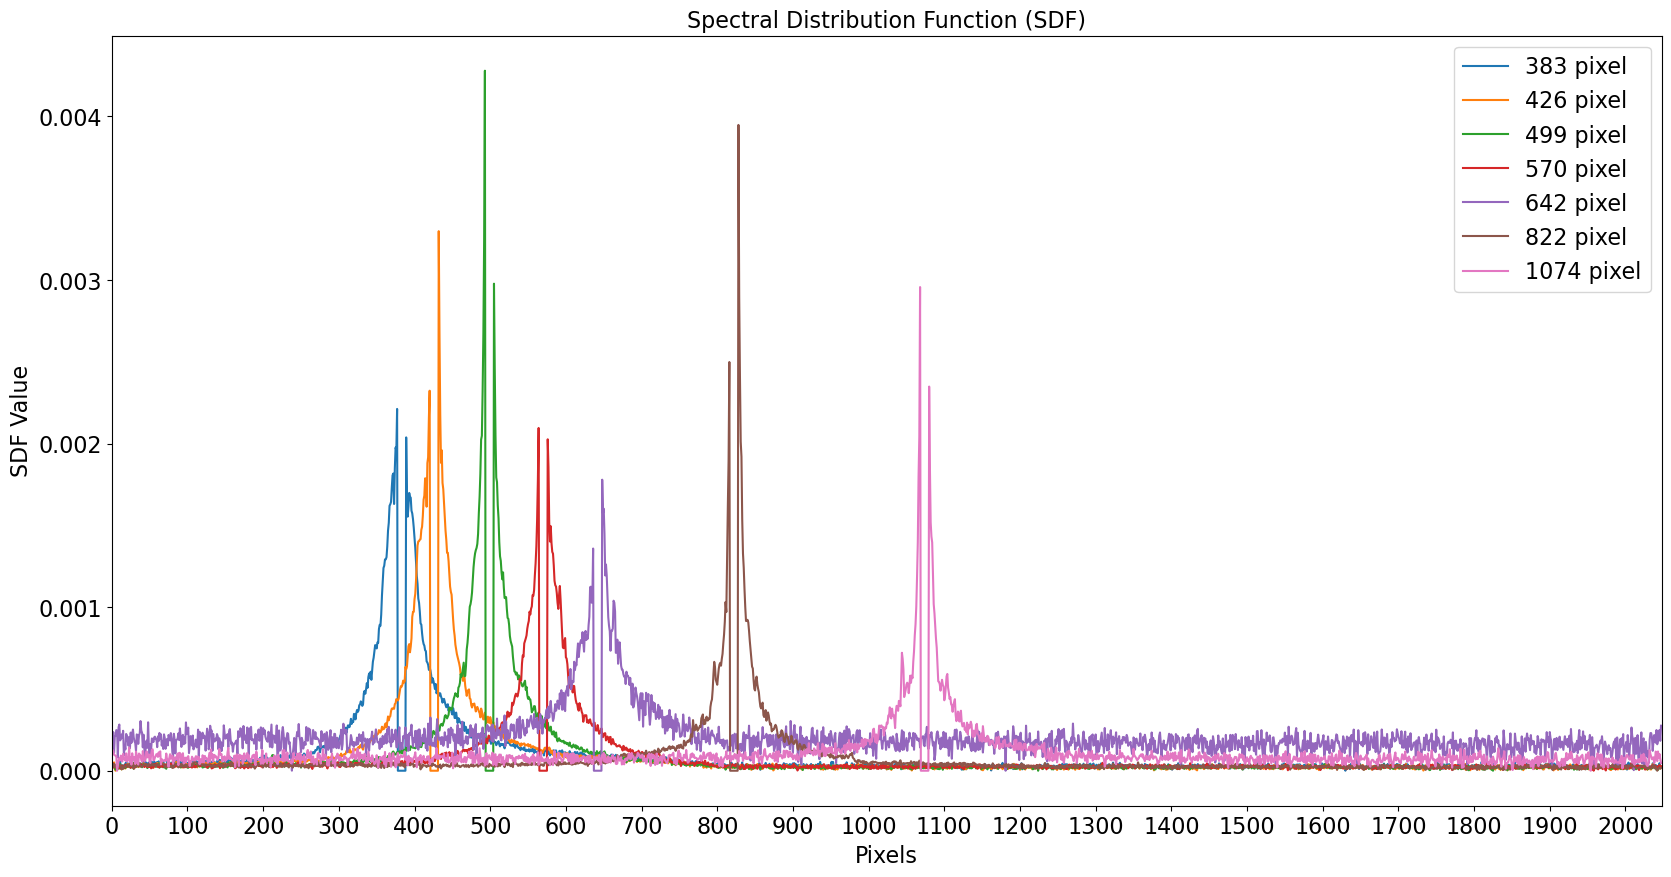

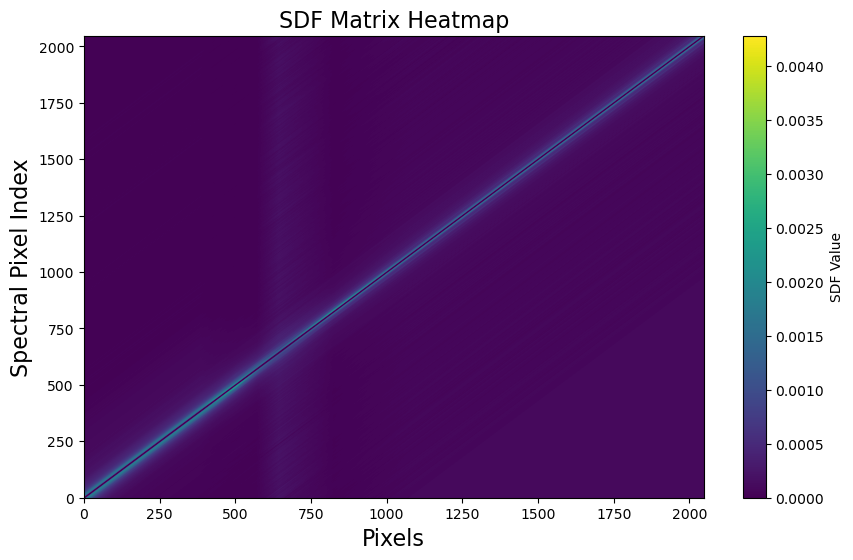

In [213]:
import numpy as np
import matplotlib.pyplot as plt

# Pixel locations of monochromatic measurements
pixel_locations = [383, 426, 499, 570, 642, 822, 1074]

# Total number of pixels in the spectrometer
total_pixels = 2048

# Create a list of LSFs for all wavelengths
lsf_list = [combine_LSF_375nm, combine_LSF_405nm, combine_LSF_445nm, combine_LSF_488nm, combine_LSF_green, combine_LSF_640nm, combine_LSF_750nm]

# Initialize an empty SDF matrix (size: total_pixels x total_pixels)
SDF_matrix = np.zeros((total_pixels, total_pixels))

ib_region_size = 11
# Define the corrected function to normalize the LSF and set IB values to zero
def normalize_lsf_correct(lsf, pixel_number):
    # Get the in-band region (IB) around the pixel where the monochromatic source was measured
    ib_start = max(0, pixel_number - ib_region_size // 2)
    ib_end = min(len(lsf), pixel_number + ib_region_size // 2 + 1)
    ib_region = np.arange(ib_start, ib_end)
    
    # Calculate the sum of IB values
    ib_sum = np.sum(lsf[ib_region])
    
    # Set IB values to zero
    lsf[ib_region] = 0
    
    # Normalize the remaining OOB values by their total sum
    normalized_lsf = lsf / ib_sum
    
    return normalized_lsf

# Place normalized LSFs in the appropriate columns
for i, (lsf, pixel_number) in enumerate(zip(lsf_list, pixel_locations)):
    normalized_lsf = normalize_lsf_correct(np.copy(lsf), pixel_number)  # Normalize the LSF correctly
    SDF_matrix[:, pixel_number] = normalized_lsf  # Set the normalized LSF as a column in the SDF matrix

def diagonal_linear_interpolation(SDF_matrix, pixel_locations):
    # Step 1: Circularly shift columns up
    def circular_shift(SDF_matrix, pixel_locations):
        result = SDF_matrix.copy()
        # Loop through each column from pixel_locations[0]+1 to pixel_locations[-1]
        for shift_idx, col_idx in enumerate(range(pixel_locations[0] + 1, pixel_locations[-1] + 1)):
            result[:, col_idx] = np.roll(SDF_matrix[:, col_idx], -(shift_idx + 1))  # Shift up
        return result
    
    # Step 2: Perform row-wise linear interpolation between the columns
    def linear_interpolation(SDF_matrix, pixel_locations):
        result = SDF_matrix.copy()
        for row_idx in range(SDF_matrix.shape[0]):
            # Extract the values to interpolate between pixel_locations
            x = pixel_locations  # columns at which we have values
            y = result[row_idx, pixel_locations]  # corresponding values
            # Interpolate for the columns between pixel_locations[0] and pixel_locations[-1]
            interp_cols = range(pixel_locations[0], pixel_locations[-1] + 1)
            result[row_idx, interp_cols] = np.interp(interp_cols, x, y)  # Apply linear interpolation
        return result
    
    # Step 3: Circularly shift columns back down
    def circular_shift_down(SDF_matrix, pixel_locations):
        result = SDF_matrix.copy()
        # Loop through each column from pixel_locations[0]+1 to pixel_locations[-1]
        for shift_idx, col_idx in enumerate(range(pixel_locations[0] + 1, pixel_locations[-1] + 1)):
            result[:, col_idx] = np.roll(SDF_matrix[:, col_idx], (shift_idx + 1))  # Shift down
        return result
    
    # Perform the operations sequentially
    shifted_matrix = circular_shift(SDF_matrix, pixel_locations)
    interpolated_matrix = linear_interpolation(shifted_matrix, pixel_locations)
    restored_matrix = circular_shift_down(interpolated_matrix, pixel_locations)
    
    return restored_matrix

SDF_matrix = diagonal_linear_interpolation(SDF_matrix, pixel_locations)

# Handle the shift for the first LSF to the left (from first LSF to pixel 0)
first_pixel = pixel_locations[0]
for col in range(first_pixel - 1, -1, -1):
    shift_amount = first_pixel - col
    SDF_matrix[:-shift_amount, col] = SDF_matrix[shift_amount:, first_pixel]
    SDF_matrix[-shift_amount:, col] = 0  # Zero out the shifted-in region

# Shift the right-most LSF downward across columns to the right
last_lsf_pixel = pixel_locations[-1]  # The right-most LSF pixel

for col in range(last_lsf_pixel + 1, total_pixels):
    shift_amount = col - last_lsf_pixel
    SDF_matrix[shift_amount:, col] = SDF_matrix[:-shift_amount, last_lsf_pixel]
    SDF_matrix[:shift_amount, col] = 0  # Zero out the shifted-in region

# Replace bottom 0 values with the last row value of the shifting LSF
for i in range(len(pixel_locations) - 1, -1, -1):
    current_pixel = pixel_locations[i]
    if i == 0:
        stop_col = 0
    else:
        stop_col = pixel_locations[i - 1] + 1

    last_value = SDF_matrix[-1, current_pixel]
    
    for col in range(current_pixel - 1, stop_col - 1, -1):
        # Define the in-band (IB) region for this column
        ib_start = max(0, col - ib_region_size // 2)
        ib_end = min(total_pixels, col + ib_region_size // 2 + 1)
        
        # Mask to identify zeros outside the IB region
        for row in range(ib_end, total_pixels):
            if SDF_matrix[row, col] == 0:
                SDF_matrix[row, col] = last_value

# Replace top 0 values with the first row value of the shifting LSF
last_lsf_pixel = pixel_locations[-1]  # The right-most LSF pixel
first_value = SDF_matrix[0, last_lsf_pixel]

for col in range(last_lsf_pixel + 1, total_pixels):
    # Define the in-band (IB) region for this column
    ib_start = max(0, col - ib_region_size // 2)
    ib_end = min(total_pixels, col + ib_region_size // 2 + 1)
    
    # Mask to identify zeros outside the IB region
    for row in range(0, ib_start):
        if SDF_matrix[row, col] == 0:
            SDF_matrix[row, col] = first_value


# Plot the updated SDF matrix
plt.figure(figsize=(20, 10))
#plt.yscale('log')
plt.xlim(0,2048)
plt.yticks(fontsize=16)
#for col in range(0,2048):
for col in pixel_locations:
    plt.plot(SDF_matrix[:, col], label= f'{col} pixel')
plt.xticks(np.arange(0, 2048, 100),fontsize=16)
plt.xlabel('Pixels',fontsize=16)
plt.ylabel('SDF Value',fontsize=16)
plt.title('Spectral Distribution Function (SDF)',fontsize=16)
#plt.ylim(0,0.0035)
plt.legend(fontsize=16)
#plt.grid(True)
plt.show()

# Plot a heatmap of the full SDF matrix
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(SDF_matrix, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(im, label='SDF Value')
ax.set_xlabel('Pixels',fontsize=16)
ax.set_ylabel('Spectral Pixel Index',fontsize=16)
plt.title('SDF Matrix Heatmap',fontsize=16)
plt.show()

# Step 1: Create the Identity Matrix
identity_matrix = np.eye(total_pixels)
# Step 2: Add the Identity Matrix to the SDF Matrix to create the A matrix
A_matrix = identity_matrix + SDF_matrix
# Step 3: Invert the A matrix to get the correction matrix
correction_matrix11 = np.linalg.inv(A_matrix)


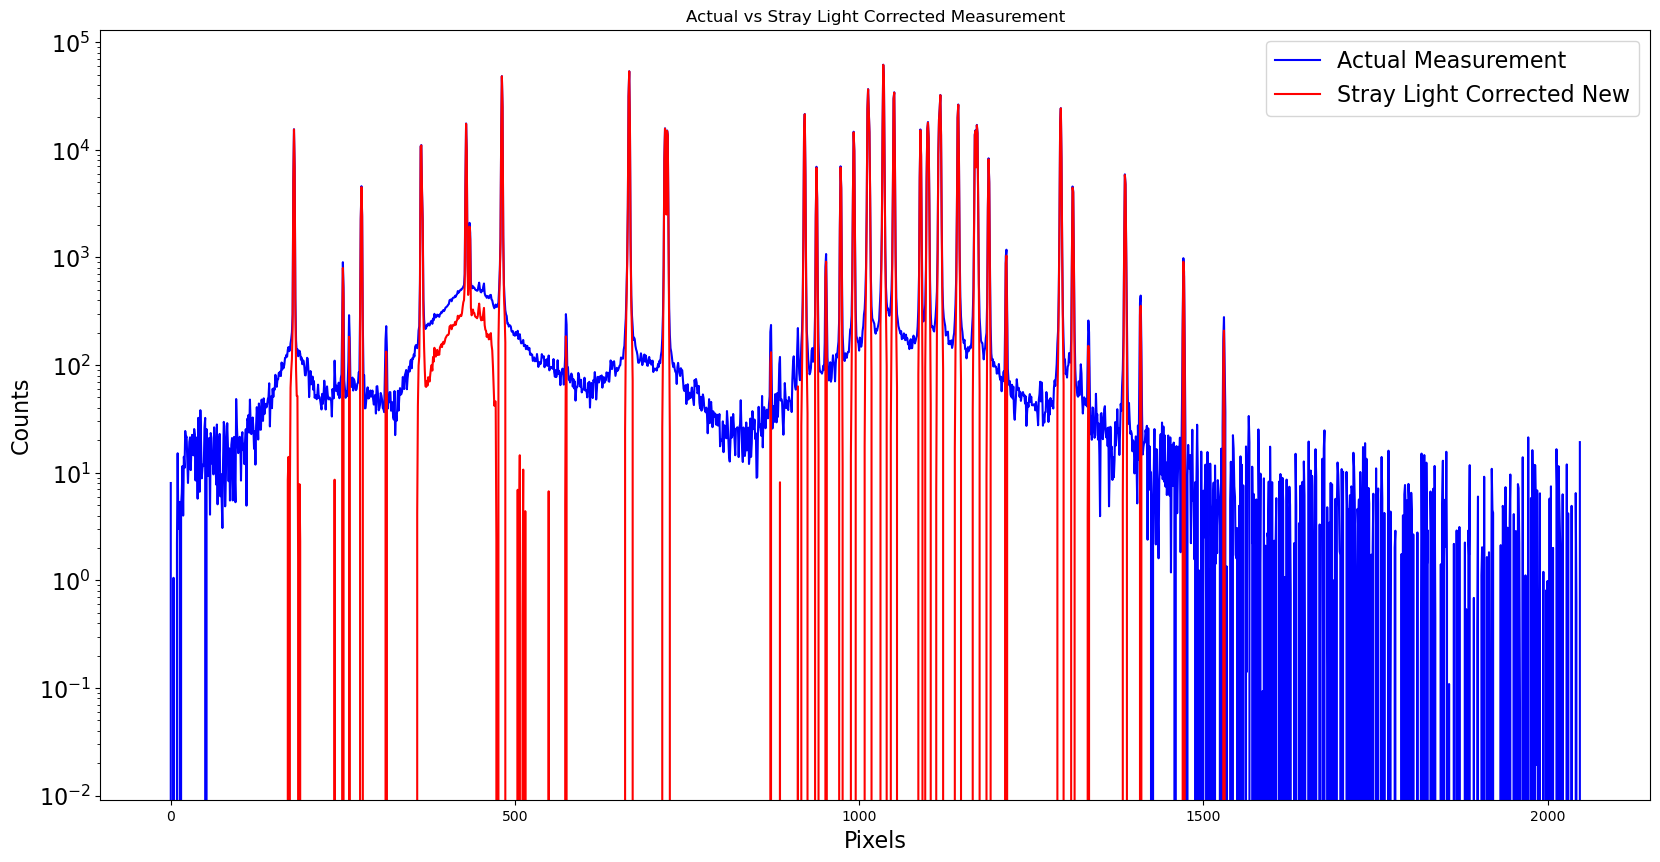

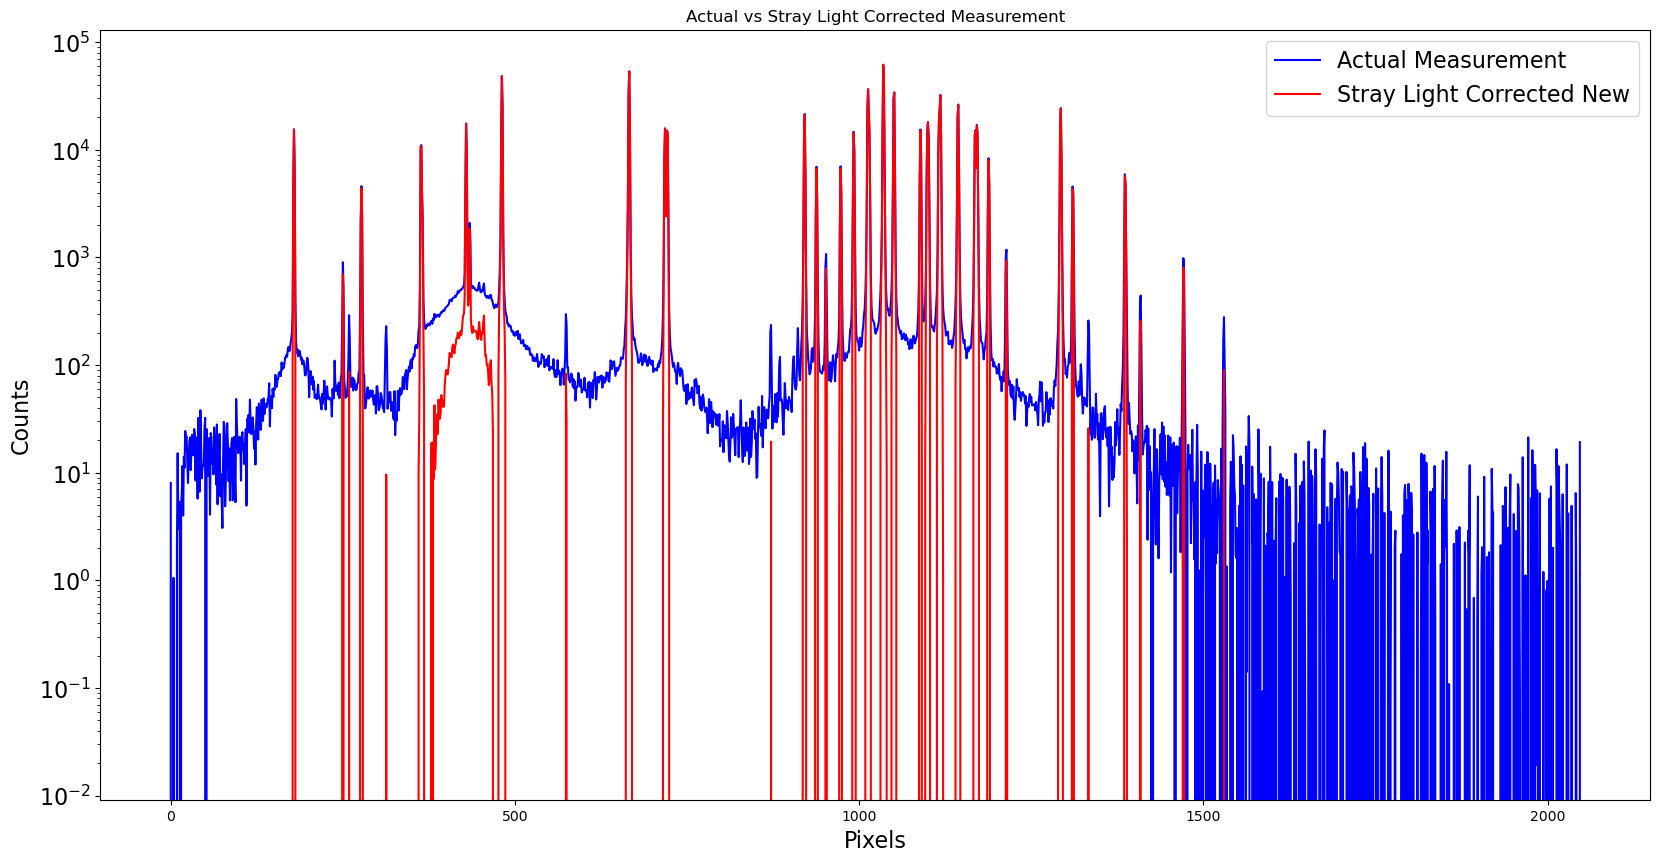

In [207]:
actual_meas = np.copy(mercury_lamp[2, :]) 

# Step 4: Apply the correction matrix to the measurement data
corrected_meas = np.dot(correction_matrix11, actual_meas)
corrected_meas = np.clip(corrected_meas, 0, None)

corrected_meas2 = np.dot(correction_matrix__11, actual_meas)
corrected_meas2 = np.clip(corrected_meas2, 0, None)

# Step 5: Plot the actual vs stray-light-corrected measurement
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.yticks(fontsize=16)
plt.plot(pixels, actual_meas, label="Actual Measurement", color="blue")
plt.plot(pixels, corrected_meas, label="Stray Light Corrected New", color="red")
plt.xlabel("Pixels",fontsize=16)
plt.ylabel("Counts",fontsize=16)
plt.title("Actual vs Stray Light Corrected Measurement")
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.plot(pixels, actual_meas, label="Actual Measurement", color="blue")
plt.plot(pixels, corrected_meas2, label="Stray Light Corrected New", color="red")
plt.xlabel("Pixels",fontsize=16)
plt.ylabel("Counts",fontsize=16)
plt.title("Actual vs Stray Light Corrected Measurement")
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


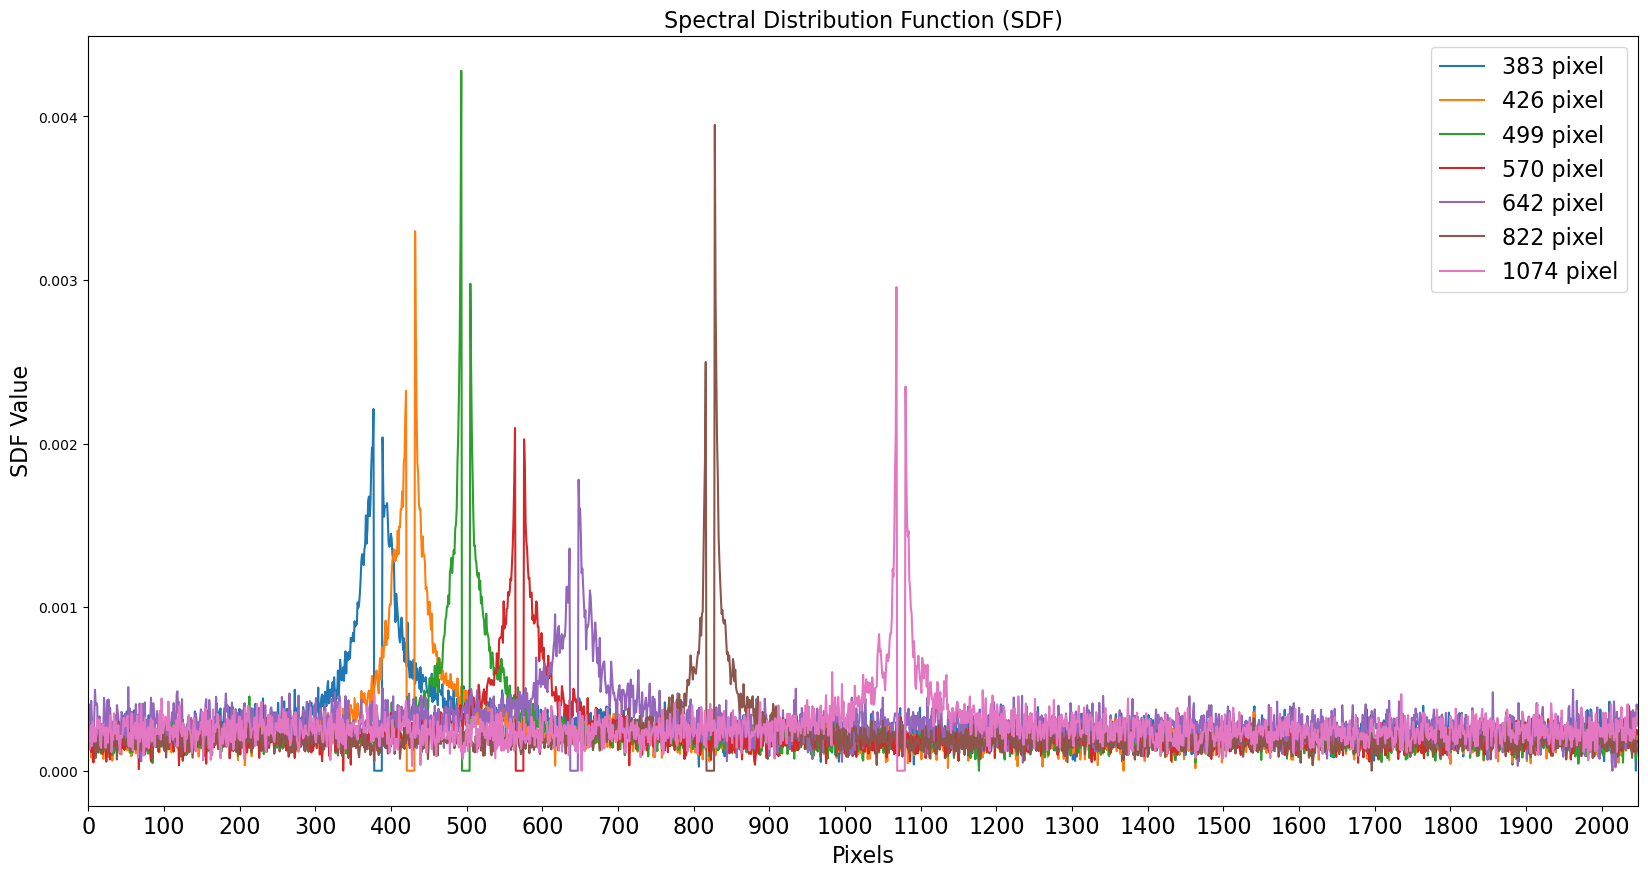

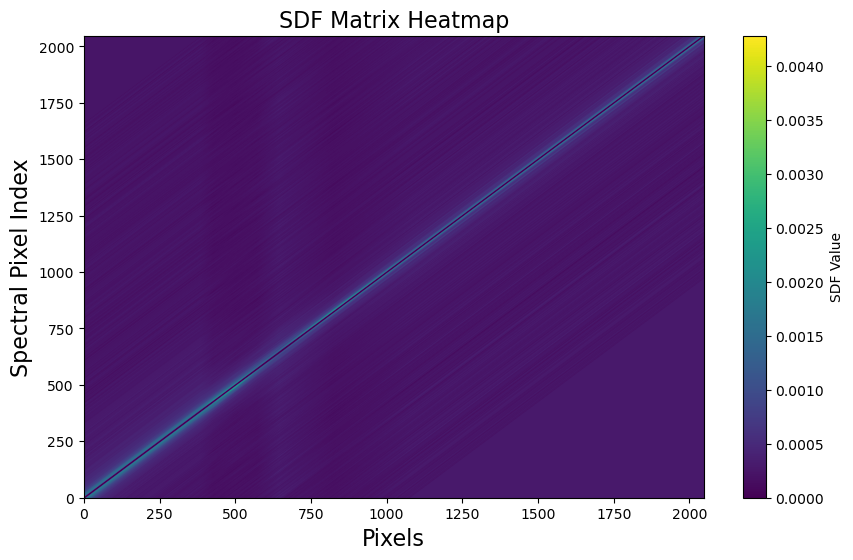

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Pixel locations of monochromatic measurements
pixel_locations = [383, 426, 499, 570, 642, 822, 1074]

# Total number of pixels in the spectrometer
total_pixels = 2048

# Create a list of LSFs for all wavelengths
lsf_list = [normalize(lsf_375nm[0, :]), normalize(lsf_405nm[0, :]), normalize(lsf_445nm[0, :]), normalize(lsf_488nm[0, :]), normalize(lsf_green[0, :]), normalize(lsf_640nm[0, :]), normalize(lsf_700nm[0, :])]

# Initialize an empty SDF matrix (size: total_pixels x total_pixels)
SDF_matrix = np.zeros((total_pixels, total_pixels))

ib_region_size = 11
# Define the corrected function to normalize the LSF and set IB values to zero
def normalize_lsf_correct(lsf, pixel_number):
    # Get the in-band region (IB) around the pixel where the monochromatic source was measured
    ib_start = max(0, pixel_number - ib_region_size // 2)
    ib_end = min(len(lsf), pixel_number + ib_region_size // 2 + 1)
    ib_region = np.arange(ib_start, ib_end)
    
    # Calculate the sum of IB values
    ib_sum = np.sum(lsf[ib_region])
    
    # Set IB values to zero
    lsf[ib_region] = 0
    
    # Normalize the remaining OOB values by their total sum
    normalized_lsf = lsf / ib_sum
    
    return normalized_lsf

# Place normalized LSFs in the appropriate columns
for i, (lsf, pixel_number) in enumerate(zip(lsf_list, pixel_locations)):
    normalized_lsf = normalize_lsf_correct(np.copy(lsf), pixel_number)  # Normalize the LSF correctly
    SDF_matrix[:, pixel_number] = normalized_lsf  # Set the normalized LSF as a column in the SDF matrix

def diagonal_linear_interpolation(SDF_matrix, pixel_locations):
    # Step 1: Circularly shift columns up
    def circular_shift(SDF_matrix, pixel_locations):
        result = SDF_matrix.copy()
        # Loop through each column from pixel_locations[0]+1 to pixel_locations[-1]
        for shift_idx, col_idx in enumerate(range(pixel_locations[0] + 1, pixel_locations[-1] + 1)):
            result[:, col_idx] = np.roll(SDF_matrix[:, col_idx], -(shift_idx + 1))  # Shift up
        return result
    
    # Step 2: Perform row-wise linear interpolation between the columns
    def linear_interpolation(SDF_matrix, pixel_locations):
        result = SDF_matrix.copy()
        for row_idx in range(SDF_matrix.shape[0]):
            # Extract the values to interpolate between pixel_locations
            x = pixel_locations  # columns at which we have values
            y = result[row_idx, pixel_locations]  # corresponding values
            # Interpolate for the columns between pixel_locations[0] and pixel_locations[-1]
            interp_cols = range(pixel_locations[0], pixel_locations[-1] + 1)
            result[row_idx, interp_cols] = np.interp(interp_cols, x, y)  # Apply linear interpolation
        return result
    
    # Step 3: Circularly shift columns back down
    def circular_shift_down(SDF_matrix, pixel_locations):
        result = SDF_matrix.copy()
        # Loop through each column from pixel_locations[0]+1 to pixel_locations[-1]
        for shift_idx, col_idx in enumerate(range(pixel_locations[0] + 1, pixel_locations[-1] + 1)):
            result[:, col_idx] = np.roll(SDF_matrix[:, col_idx], (shift_idx + 1))  # Shift down
        return result
    
    # Perform the operations sequentially
    shifted_matrix = circular_shift(SDF_matrix, pixel_locations)
    interpolated_matrix = linear_interpolation(shifted_matrix, pixel_locations)
    restored_matrix = circular_shift_down(interpolated_matrix, pixel_locations)
    
    return restored_matrix

SDF_matrix = diagonal_linear_interpolation(SDF_matrix, pixel_locations)

# Handle the shift for the first LSF to the left (from first LSF to pixel 0)
first_pixel = pixel_locations[0]
for col in range(first_pixel - 1, -1, -1):
    shift_amount = first_pixel - col
    SDF_matrix[:-shift_amount, col] = SDF_matrix[shift_amount:, first_pixel]
    SDF_matrix[-shift_amount:, col] = 0  # Zero out the shifted-in region

# Shift the right-most LSF downward across columns to the right
last_lsf_pixel = pixel_locations[-1]  # The right-most LSF pixel

for col in range(last_lsf_pixel + 1, total_pixels):
    shift_amount = col - last_lsf_pixel
    SDF_matrix[shift_amount:, col] = SDF_matrix[:-shift_amount, last_lsf_pixel]
    SDF_matrix[:shift_amount, col] = 0  # Zero out the shifted-in region

# Replace bottom 0 values with the last row value of the shifting LSF
for i in range(len(pixel_locations) - 1, -1, -1):
    current_pixel = pixel_locations[i]
    if i == 0:
        stop_col = 0
    else:
        stop_col = pixel_locations[i - 1] + 1

    last_value = SDF_matrix[-1, current_pixel]
    
    for col in range(current_pixel - 1, stop_col - 1, -1):
        # Define the in-band (IB) region for this column
        ib_start = max(0, col - ib_region_size // 2)
        ib_end = min(total_pixels, col + ib_region_size // 2 + 1)
        
        # Mask to identify zeros outside the IB region
        for row in range(ib_end, total_pixels):
            if SDF_matrix[row, col] == 0:
                SDF_matrix[row, col] = last_value

# Replace top 0 values with the first row value of the shifting LSF
last_lsf_pixel = pixel_locations[-1]  # The right-most LSF pixel
first_value = SDF_matrix[0, last_lsf_pixel]

for col in range(last_lsf_pixel + 1, total_pixels):
    # Define the in-band (IB) region for this column
    ib_start = max(0, col - ib_region_size // 2)
    ib_end = min(total_pixels, col + ib_region_size // 2 + 1)
    
    # Mask to identify zeros outside the IB region
    for row in range(0, ib_start):
        if SDF_matrix[row, col] == 0:
            SDF_matrix[row, col] = first_value


# Plot the updated SDF matrix
plt.figure(figsize=(20, 10))
#plt.yscale('log')
plt.xlim(0,2048)
#for col in range(0,2048):
for col in pixel_locations:
    plt.plot(SDF_matrix[:, col], label= f'{col} pixel')
plt.xticks(np.arange(0, 2048, 100),fontsize=16)
plt.xlabel('Pixels',fontsize=16)
plt.ylabel('SDF Value',fontsize=16)
plt.title('Spectral Distribution Function (SDF)',fontsize=16)
#plt.ylim(0,0.0035)
plt.legend(fontsize=16)
#plt.grid(True)
plt.show()

# Plot a heatmap of the full SDF matrix
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(SDF_matrix, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(im, label='SDF Value')
ax.set_xlabel('Pixels',fontsize=16)
ax.set_ylabel('Spectral Pixel Index',fontsize=16)
plt.title('SDF Matrix Heatmap',fontsize=16)
plt.show()

# Step 1: Create the Identity Matrix
identity_matrix = np.eye(total_pixels)
# Step 2: Add the Identity Matrix to the SDF Matrix to create the A matrix
A_matrix = identity_matrix + SDF_matrix
# Step 3: Invert the A matrix to get the correction matrix
correction_matrix__11 = np.linalg.inv(A_matrix)
